# Outliers
An outlier is a data point lies far away from the distribution of data. An outlier may occur due error in measurements. Outliers can cause serious problems in stastical analysis hence need to be removed or should be taken care of.

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#getting the missing values
df['Age'].isnull().sum()

177

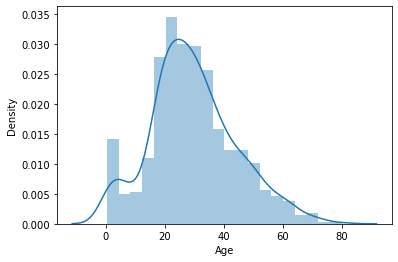

In [4]:
#distribution of 'Age'
sns.distplot(df['Age']);
#combines hist with KDE plot

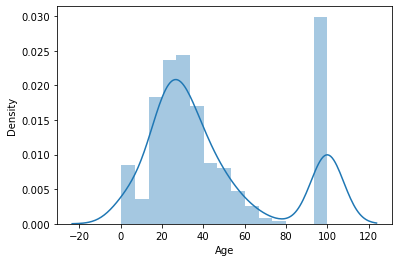

In [5]:
sns.distplot(df['Age'].fillna(100));
#fills missing values with 100 (for this plot only doesn't replace these in original dataframe)

### Gaussian Distribution

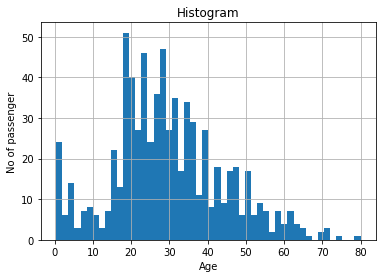

In [6]:
#distribution of 'Age' using hisogram
figure=df.Age.hist(bins=50)
figure.set_title('Histogram')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger');

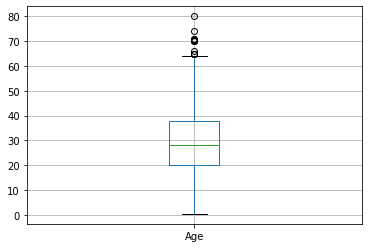

In [7]:
#boxplot of 'Age' showing the distribution
figure=df.boxplot(column="Age");
#it represents the data in terms of quartiles
#the black dots outside the 

In [8]:
#getting the stastical information
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**If the data is normally distributed we use this:**

In [9]:
#assuming 'Age' follows a gaussian distribution we will calculate the boundaries
#Gaussian distribution is also known as normal distribution
upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()
print(upper_boundary)
print(lower_boundary)
#it uses standard deviation to find the upper and lower boundaries
#and whichever data points lie outside these boundaries are termed as outliers.

73.27860964406095
-13.88037434994331


If features are skewed to the left or to the right just like given below, we use following technique :

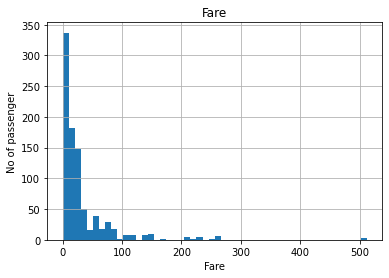

In [10]:
#when the data doesn't show gaussian distribution
#heret the datapoints seemed to be skewed towards right
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger');

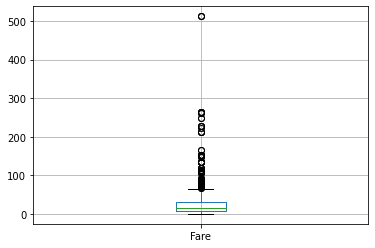

In [11]:
#boxplot of 'Fare' showing the distribution
figure=df.boxplot(column="Fare");
#you can see lot of outliers outiside the whiskers

In [12]:
#getting the stastical information
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
#lets compute the interquantile range (IQR) to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [14]:
#finding lower and upper boundaries using interquantile range (IQR)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)-(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
-3.6343999999999994


In [15]:
#Extreme Outliers using the IQR
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


### Dealing with missing values

In [16]:
#copying previous dataframe into new one
#it will avoid changes in the original dataframe
data=df.copy()

In [17]:
#locating all the values greater than 73 and replacing them with 73
data.loc[data['Age']>73,'Age']=73

In [18]:
#locating all the values greater than 100 and replacing them with 100
data.loc[data['Fare']>100,'Fare']=100

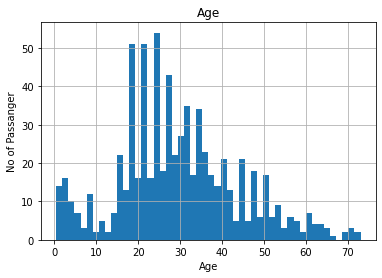

In [19]:
#distribution of 'Age' after dealing with outliers
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passanger');

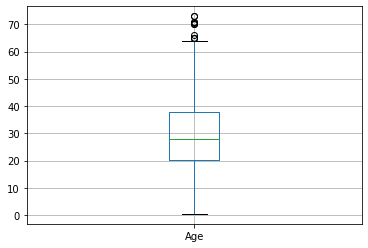

In [20]:
#boxplot of 'Age'
figure=data.boxplot(column="Age");
#lesser points outside the whiskers compared to the previous boxplot of 'Age'

Text(0, 0.5, 'No of Passanger')

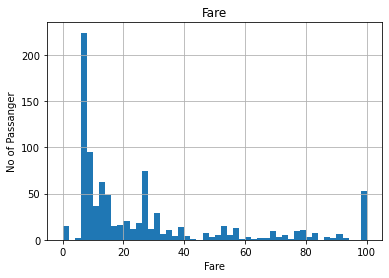

In [21]:
#distribution of 'Fare' after dealing with outliers
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passanger')

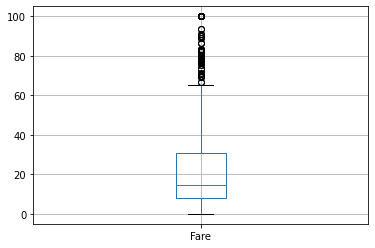

In [22]:
#boxplot of 'Fare'
figure=data.boxplot(column="Fare");
#lesser points outside the whiskers compared to previous boxplot of 'Fare'

The End